# Veri Setinin Düzenlenmesi ve İncelenmesi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("survey_results_public.csv") # 61 sütun 65 bin satırıımız var veri setimizde

In [5]:
df.head(5) 

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [7]:
# Veri setinde çok fazla sütun olduğu için birkaç sütun tutacağız çünkü kullanıcının 61 tane bilgi doldurması kullanıcıyı sıkabilir. 
# Tuttuğumuz sütunlar (Ülke , eğitim düzeyi , kaç yıldır meslekte , istihdam , ücret) 

df = df[["Country" , "EdLevel" , "YearsCodePro"  , "Employment" , "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"} , axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,United States of America,Primary/elementary school,NaN,"Employed, full-time",NaN
1,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Employed, full-time",NaN
3,Canada,Some college/university study without earning ...,NaN,"Student, full-time",NaN
4,Norway,"Secondary school (e.g. American high school, G...",NaN,"Student, full-time",NaN


In [9]:
# Salary sütunumuzdaki NaN yani boş değerler içeren satırları veri setimizden çıkartacağız

df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
72,Pakistan,"Secondary school (e.g. American high school, G...",1,"Employed, full-time;Student, full-time;Indepen...",7322.0
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,"Employed, full-time",30074.0
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",91295.0
385,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17,"Independent contractor, freelancer, or self-em...",53703.0
389,United States of America,Some college/university study without earning ...,7,"Employed, full-time;Student, part-time",110000.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 72 to 41187
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       23435 non-null  object 
 1   EdLevel       23435 non-null  object 
 2   YearsCodePro  23345 non-null  object 
 3   Employment    23435 non-null  object 
 4   Salary        23435 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


In [13]:
# Veri setindeki boş değer içeren satırları çıkaracağız. Bunun yerine bu boş değerleri dolduradabilirdik ama zaten 23 binden fazla satırımız olduğu için çıkartmayı tercih ettik.

df = df.dropna()

In [15]:
# Sütunlara göre boş değer kalmadığını kontrol etmek için

df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [17]:
df = df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17527 entries, 374 to 41185
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       17527 non-null  object 
 1   EdLevel       17527 non-null  object 
 2   YearsCodePro  17527 non-null  object 
 3   Salary        17527 non-null  float64
dtypes: float64(1), object(3)
memory usage: 684.6+ KB


In [19]:
df["Country"].value_counts()  # hangi ülkeden kaç kişinin verisi var

Country
United States of America                                3903
Germany                                                 1491
United Kingdom of Great Britain and Northern Ireland    1141
Ukraine                                                 1017
India                                                    836
                                                        ... 
Kosovo                                                     1
Oman                                                       1
Guyana                                                     1
Angola                                                     1
Mali                                                       1
Name: count, Length: 155, dtype: int64

In [21]:
# Üstteki küçük ülkelerden kurtulmak istiyoruz (Solomon Islands , Guinea , Niger gibi) çünkü sadece 1 verinin olduğu ülkeleri ...
# ... kullanırsak bu modelimizin kafasını karıştırabilir (tek bir veriden bir şey öğrenemeyeceğinden). Bu ülkeleri "Other"da toplayacağız.
# Bunun için shorten_categories (Kategorileri Kısalt) fonksiyonunu yazdık.
# Burada ülkeden gelen örnek sayısı fonksiyona girdiğim eşik değerden (cutoff) büyükse buna dokunmuyoruz ama küçükse "Other"a ekliyoruz

def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map


country_map = shorten_categories(df.Country.value_counts() , 400)
df["Country"] = df["Country"].map(country_map)
df.Country.value_counts()

# 400'den az verisi olanları "Other"a attık ve yeni "Country" sütunumuzu oluşturduk.

Country
Other                                                   5628
United States of America                                3903
Germany                                                 1491
United Kingdom of Great Britain and Northern Ireland    1141
Ukraine                                                 1017
India                                                    836
France                                                   719
Canada                                                   684
Brazil                                                   457
Spain                                                    431
Italy                                                    414
Netherlands                                              406
Australia                                                400
Name: count, dtype: int64

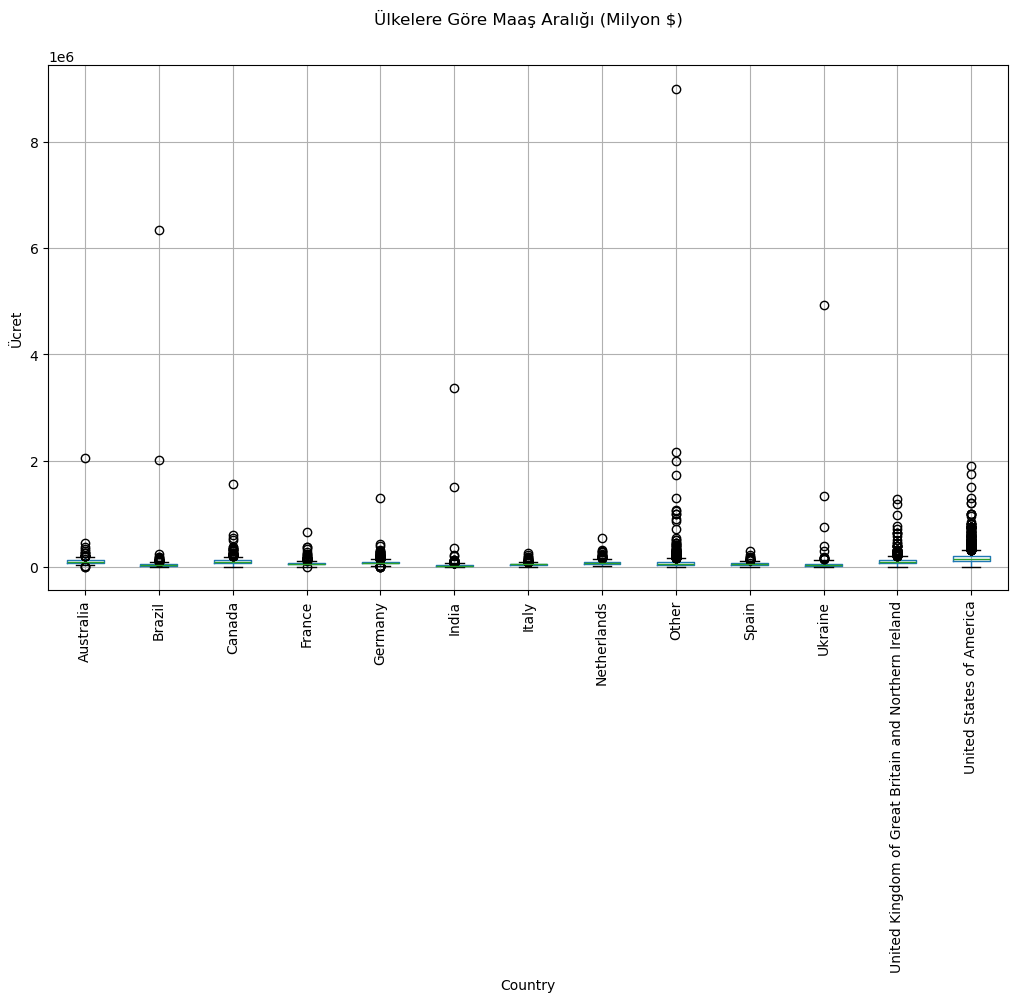

In [23]:
# Maaş aralığını görselleştirelim

fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Ülkelere Göre Maaş Aralığı (Milyon $)')
plt.title('')
plt.ylabel('Ücret')
plt.xticks(rotation=90)
plt.show()

In [25]:
# Üstteki küçük mavi çizgi aslında bizim kutumuz ve bunun üzerindekiler de aslında bizim aykırı değerlerimiz. Görüldüğü gibi çok fazla aykırı değer var
# Her bir ülke için tek tek max değeri hesaplayamayacağımız için genel grafiği incelediğimizde max maaşı 250 bin min maaş 10 bin dolar olarak tutacağız

df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

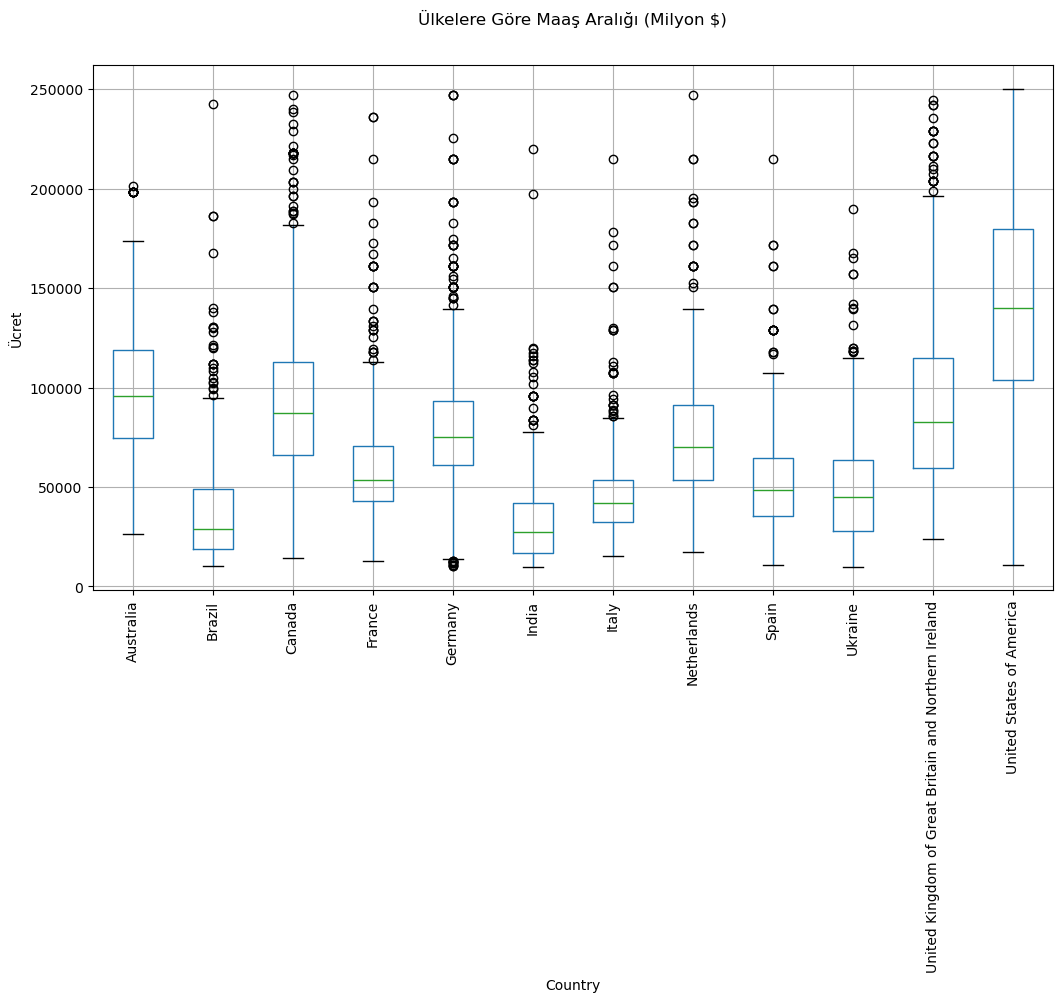

In [27]:
# Şimdi tekrar görselleştirelim

fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Ülkelere Göre Maaş Aralığı (Milyon $)')
plt.title('')
plt.ylabel('Ücret')
plt.xticks(rotation=90)
plt.show()

# Veri Ön İşleme

In [30]:
df["YearsCodePro"].unique() # YearsCodePro sütunundaki benzersiz (tekrarsız) değerleri döndürür.

array(['18', '25', '30', '50', '27', '1', '15', '11', '23', '17', '10',
       '8', '12', '26', '40', '4', '9', '22', '28', '20', '16', '13', '3',
       '35', '5', '31', '41', '36', '6', '14', '7', 'Less than 1 year',
       '24', '2', '38', '32', '21', '19', '34', '29', '43', '33', '45',
       '37', '44', '42', '39', '46', '49', '48', '47'], dtype=object)

In [32]:
# Üsteki değerlerde 1'den az ve 50'den fazla gibi değerler olduğunda 1'den azsa 0.5'e, 50'den fazlaya 50'ye sabitlemek için ...
# ... "clean_experience" fonksiyonunu yazıyoruz

def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience) # yeni YearsCodePro sütunumuz olarak ayarladık

In [34]:
# Aynısını "EdLevel" yani eğitim düzeyi için de düşünebiliriz

df["EdLevel"].unique()

array(['Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Primary/elementary school',
       'Something else'], dtype=object)

In [36]:
# 'Professional degree' ya da 'Other doctoral' ise bunu 'Post grad' gibi düşünebiliriz
# Lisans Altı - Lisans - Yüksek Lisans - Doktora gibi derecelendirdik

def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education) # yeni EdLevel sütunumuz olarak ayarladık

In [38]:
df["EdLevel"].unique() # kontrol edelim

array(['Post grad', 'Master’s degree', 'Less than a Bachelors',
       'Bachelor’s degree'], dtype=object)

 - LabelEncoder Dönüşümü

Kategorik verilerimizi sayısal verilere dönüştürmek için LabelEncoder kullanacağız. LabelEncoder, örneğin kadın 0 , erkek 1 ile temsil edilmesini sağlıyor.

In [42]:
# EdLevel değişkenimizee LabelEncoder uyguladık

from sklearn.preprocessing import LabelEncoder

le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([3, 2, 1, 0])

In [44]:
# Country değişkenimizee LabelEncoder uyguladık

le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([10, 11,  3,  4,  1,  2,  6,  5,  9,  8,  7,  0])

# Modelleme

In [47]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [49]:
X.head()

,Country,EdLevel,YearsCodePro
392,10,3,18.0
395,10,2,25.0
398,11,1,30.0
409,3,3,50.0
414,10,0,27.0


In [51]:
y.head()

392    161044.0
395    121018.0
398    195000.0
409     57999.0
414    184712.0
Name: Salary, dtype: float64

- **1.Model: Liner Regresyon**

In [54]:
# MODEL

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [56]:
# TAHMİN
y_pred = linear_reg.predict(X)

In [58]:
# HATA ORANI

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

error = np.sqrt(mean_squared_error(y, y_pred)) # normalde y_test vs şeklinde ayırmamız gerekiyordu x ve y'yi ancak burada basit olması açısından bunu tüm veriler üzerinden yapıyoruz
print("${:,.02f}".format(error))

# Bu şu anlama geliyor: Ücretlerin 10.000 - 250.000 aralığında olduğunu düşünürsek maaşı her tahmin ettiğimizde ortalama olarak $ 45.500 dolar sapmış oluyoruz.

$45,073.44


- **2.Model: Karar Ağaçları**

In [61]:
# MODEL

from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=42)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=42)

In [63]:
# TAHMİN

y_pred = dec_tree_reg.predict(X)

In [65]:
# HATA ORANI

error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

# Bu şu anlama geliyor: Ücretlerin 10.000 - 250.000 aralığında olduğunu düşünürsek maaşı her tahmin ettiğimizde ortalama olarak $ 33.200 dolar sapmış oluyoruz.

$31,646.22


- **3.Model: Random Forest**

In [ ]:
# MODEL

from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X, y.values)

In [ ]:
# TAHMİN

y_pred = random_forest_reg.predict(X)

In [ ]:
# HATA ORANI

error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

# Bu şu anlama geliyor: Ücretlerin 10.000 - 250.000 aralığında olduğunu düşünürsek maaşı her tahmin ettiğimizde ortalama olarak $ 33.320 dolar sapmış oluyoruz.

- **4.Model: GBM**

In [ ]:
# MODEL

from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X, y.values)

In [ ]:
# TAHMİN

y_pred = gbm_model.predict(X)

In [ ]:
# HATA ORANI

error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

# Bu şu anlama geliyor: Ücretlerin 10.000 - 250.000 aralığında olduğunu düşünürsek maaşı her tahmin ettiğimizde ortalama olarak $ 35.400 dolar sapmış oluyoruz.

**Modellerin Karşılaştırılması**

In [ ]:
# MODELLER

modeller = [linear_reg , dec_tree_reg , random_forest_reg , gbm_model]

sonuc = []

sonuclar = pd.DataFrame(columns=["Modeller" , "Accuracy"])

In [ ]:
for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X)
    doğruluk = np.sqrt(mean_squared_error(y, y_pred))
    sonuc = pd.DataFrame([[isimler, doğruluk]], columns=["Modeller", "Accuracy"])
    sonuclar = pd.concat([sonuclar, sonuc], ignore_index=True)

In [ ]:
sonuclar

# Denediğimiz modeller arasında en iyi sonucu Karar Ağaçları verdi

In [ ]:
X


modeli yeniden eğitmeye veya veri işleme adımlarını tekrar tekrar yapmaya gerek kalmadan, kaydedilen modeli ve onunla ilişkili veri işleme adımlarını başka bir zaman veya ortamda yeniden kullanmayı mümkün kılar.

In [ ]:
import pickle

In [ ]:
data = {
    "model": dec_tree_reg,
    "le_country": le_country, 
    "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]